# Beispiel Stromproduktion 1: Visualisierung Stromproduktion

### Datenvisualisierung mit Python/Matplotlib

### Datenbeispiel: Stromproduktion in der Schweiz

Datenquelle: Bundesamt für Energie
Webseite: https://opendata.swiss/dataset/energiedashboard-ch-stromproduktion-swissgrid

Zeitpunkt der Abfrage: 06.08.2024

Format: CSV (.csv)

## 1. Einlesen und Organisation der Daten

Zum importieren von CSV-Files kann das Modul Pandas verwendet werden.
https://pandas.pydata.org/


Installieren mit Anaconda (im Anaconda Prompt (Windows) oder Terminal (Linux oder MacOS):

    conda install pandas


#### Modul Pandas importieren

In [1]:
#Pandas importieren
import pandas as pd

#### Datenfile lesen und anzeigen

Das Datenfile muss zuerst von der angegebenen Datenquelle heruntergeladen und im Arbeitsordner gespeichert werden. Pandas stellt Reader für verschiedene Formate zur Verfügung. Der entsprechende Reader read_csv() wird ausgewählt und bekommt als parameter den Filenamen. Die Daten werden dann im Dataframe df gespeichert.

In [2]:
# CSV-file lesen
df = pd.read_csv('ogd104_stromproduktion_swissgrid.csv')

In [3]:
# Eingelesene Daten anzeigen
df

,Datum,Energietraeger,Produktion_GWh
0,2014-01-01,Flusskraft,26.1
1,2014-01-01,Kernkraft,80.1
2,2014-01-01,Speicherkraft,23.3
3,2014-01-01,Thermische,10.3
4,2014-01-02,Flusskraft,26.0
...,...,...,...
22485,2024-08-05,Kernkraft,71.9
22486,2024-08-05,Photovoltaik,24.5
22487,2024-08-05,Speicherkraft,137.2
22488,2024-08-05,Thermische,9.5


#### Struktur der Dataframes

Datenstruktur: Dictionnary; die Spalten des CSV-files sind über Keys() zugänglich

In [4]:
# Verfügbare Keys anzeigen lassen
df.keys()

Index(['Datum', 'Energietraeger', 'Produktion_GWh'], dtype='object')

In [5]:
# Eine bestimmte Spalte auswählen
df['Energietraeger']

0           Flusskraft
1            Kernkraft
2        Speicherkraft
3           Thermische
4           Flusskraft
             ...      
22485        Kernkraft
22486     Photovoltaik
22487    Speicherkraft
22488       Thermische
22489             Wind
Name: Energietraeger, Length: 22490, dtype: object

#### Daten neu ordnen: Datensatz in verschiedene Zeitreihen nach Energieträger gruppieren

Im Inputfile sind alle Energieerzeugungsdaten in der zweiten Spalte gespeichert, der jeweilige Energieträger ist jeweils in der ersten Spalte angegeben. Zur Visualisierung müssen die Daten nach Energieträger gruppiert werden.

In [6]:
# Liste der verschiedenen Energieträger erstellen
Energiearten = [] # Leere Liste initialisieren
for en in df['Energietraeger']:
      if not en in Energiearten: # Energieart hinzufügen, wenn sie noch nicht auf der Liste ist
          Energiearten.append(en); 

print('Liste der Energieträger: \n', Energiearten) # Liste ausgeben

Liste der Energieträger: 
 ['Flusskraft', 'Kernkraft', 'Speicherkraft', 'Thermische', 'Photovoltaik', 'Wind']


Um alle Datenpunkte eines Energieträgers auszuwählen kann die Eigenschaft pandas.DataFrame.loc verwendet werden:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [7]:
# Mit df.loc alle Einträge für einen bestimmten Energieträger auswählen und in neuem Dataframe speichern
df_fluss = df.loc[df['Energietraeger'] == 'Flusskraft']
df_kern = df.loc[df['Energietraeger'] == 'Kernkraft']
df_speicher = df.loc[df['Energietraeger'] == 'Speicherkraft']
df_therm = df.loc[df['Energietraeger'] == 'Thermische']
df_photo = df.loc[df['Energietraeger'] == 'Photovoltaik']
df_wind = df.loc[df['Energietraeger'] == 'Wind']

In [8]:
# Anzahl Datenpunkte pro Energieträger ausgeben
print('Anzahl Datenpunkte pro Energieträger:\n')
print('\tFlusskraft:\t', len(df_fluss))
print('\tKernkraft:\t', len(df_kern))
print('\tSpeicherkraft:\t', len(df_speicher))
print('\tThermische:\t', len(df_therm))
print('\tPhotovoltaik:\t', len(df_photo))
print('\tWind:\t\t', len(df_wind))

Anzahl Datenpunkte pro Energieträger:

	Flusskraft:	 3870
	Kernkraft:	 3870
	Speicherkraft:	 3870
	Thermische:	 3870
	Photovoltaik:	 3505
	Wind:		 3505


## 2. Visualisierung der Stromerzeugung verschiedener Energieträger

Visualisierung der Zeitreihen einzeln und im Vergleich

#### Notwendige Module importieren

In [9]:
# Matplotlib zum erstellen der Grafiken
import matplotlib.pyplot as plt

### Visualisierung 1: Eine Zeitreihe visualisieren

Die Stromproduktion jedes Energieträgers über die Zeit ist eine Zeitreihe. 

<Figure size 640x500 with 0 Axes>

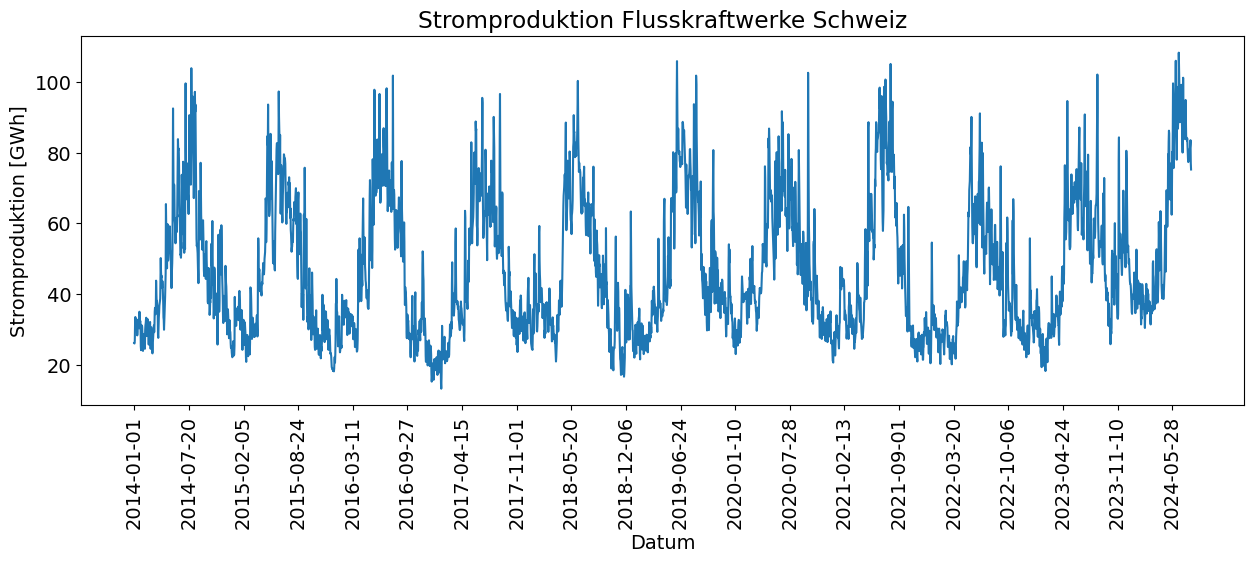

In [10]:
# Visualisierung der Stromproduktion aus Flusskraft
plt.figure().set_figheight(5) # Höhe des Plots
plt.figure().set_figwidth(15) # Breite des Plots
plt.rcParams.update({'font.size': 14}) # Schriftgrösse definieren

plt.plot(df_fluss['Datum'],df_fluss['Produktion_GWh']) # Plotten der Stromproduktion nach Datum

plt.xlabel('Datum') # Beschriftung x-Achse
plt.ylabel('Stromproduktion [GWh]') # Beschriftung y-Achse

# Beschriftung der Achsenpunkte: Reduktion der Punkte zur besseren Lesbarkeit
plt.xticks(df_fluss['Datum'][0::200], rotation='vertical')  

plt.title("Stromproduktion Flusskraftwerke Schweiz") # Titel des Plots

plt.savefig('Stromproduktion_Flusskraft.png', bbox_inches='tight') # Plot in einem PNG-File speichern

plt.show()

### Visualisierung 2: Mehrere Zeitreihen visualisieren

Um mehrere Zeitreihen zu vergleichen müssen diese in einem Plot kombiniert werden. Das Plotten der Zeitreihen übereinander erweist sich dabei als nicht nützlich, da die einzelnen Zeitreihen kaum zu erkennen sind. Die Gliederung in verschiedene Subplots ist die bessere Lösung.

<Figure size 640x700 with 0 Axes>

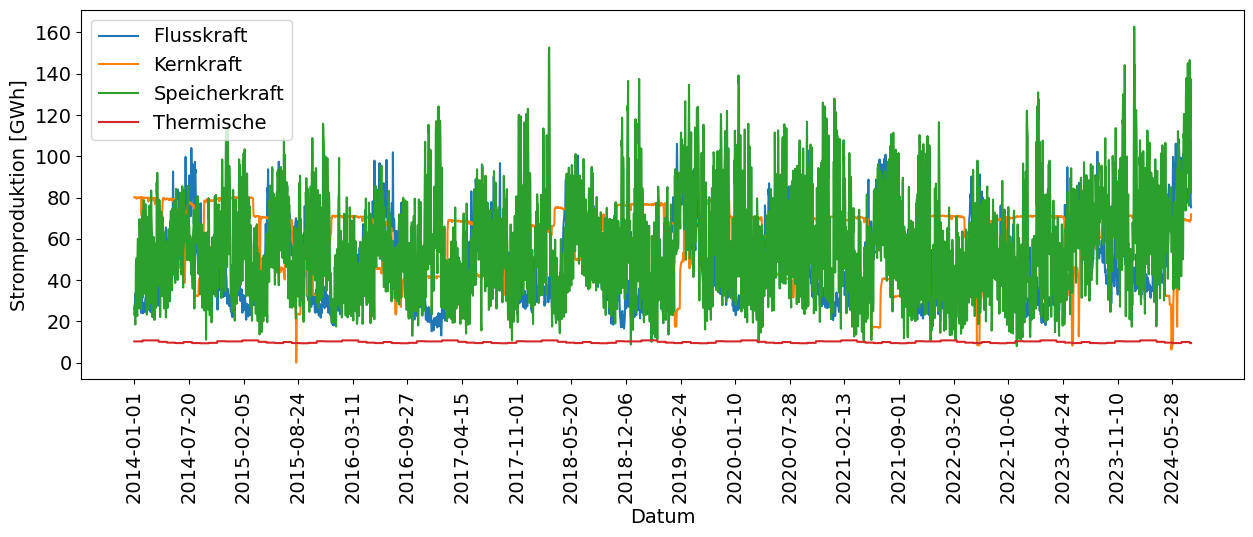

In [11]:
# Visualisierung der verschiedenen Zeitreihen im gleichen Plot
plt.figure().set_figheight(7) # Höhe des Plots
plt.figure().set_figwidth(15) # Breite des Plots
plt.rcParams.update({'font.size': 14}) # Schriftgrösse definieren

plt.plot(df_fluss['Datum'],df_fluss['Produktion_GWh']) # Plotten der Stromproduktion aus Flusskraft
plt.plot(df_kern['Datum'],df_kern['Produktion_GWh']) # Plotten der Stromproduktion aus Kernkraft
plt.plot(df_speicher['Datum'],df_speicher['Produktion_GWh']) # Plotten der Stromproduktion aus Speicherkraft
plt.plot(df_therm['Datum'],df_therm['Produktion_GWh']) # Plotten der Stromproduktion aus Thermische Kraftwerke

plt.xlabel('Datum') # Beschriftung x-Achse
plt.ylabel('Stromproduktion [GWh]') # Beschriftung y-Achse

# Beschriftung der Achsenpunkte: Reduktion der Punkte zur besseren Lesbarkeit
plt.xticks(df_fluss['Datum'][0::200], rotation='vertical')  

plt.legend(['Flusskraft', 'Kernkraft', 'Speicherkraft', 'Thermische']) # Beschriftung der Datensätze

plt.show()

Visualisierung der Daten in mehreren Subplots: die einzelnen Datensätze sind so gut zu erkennen.

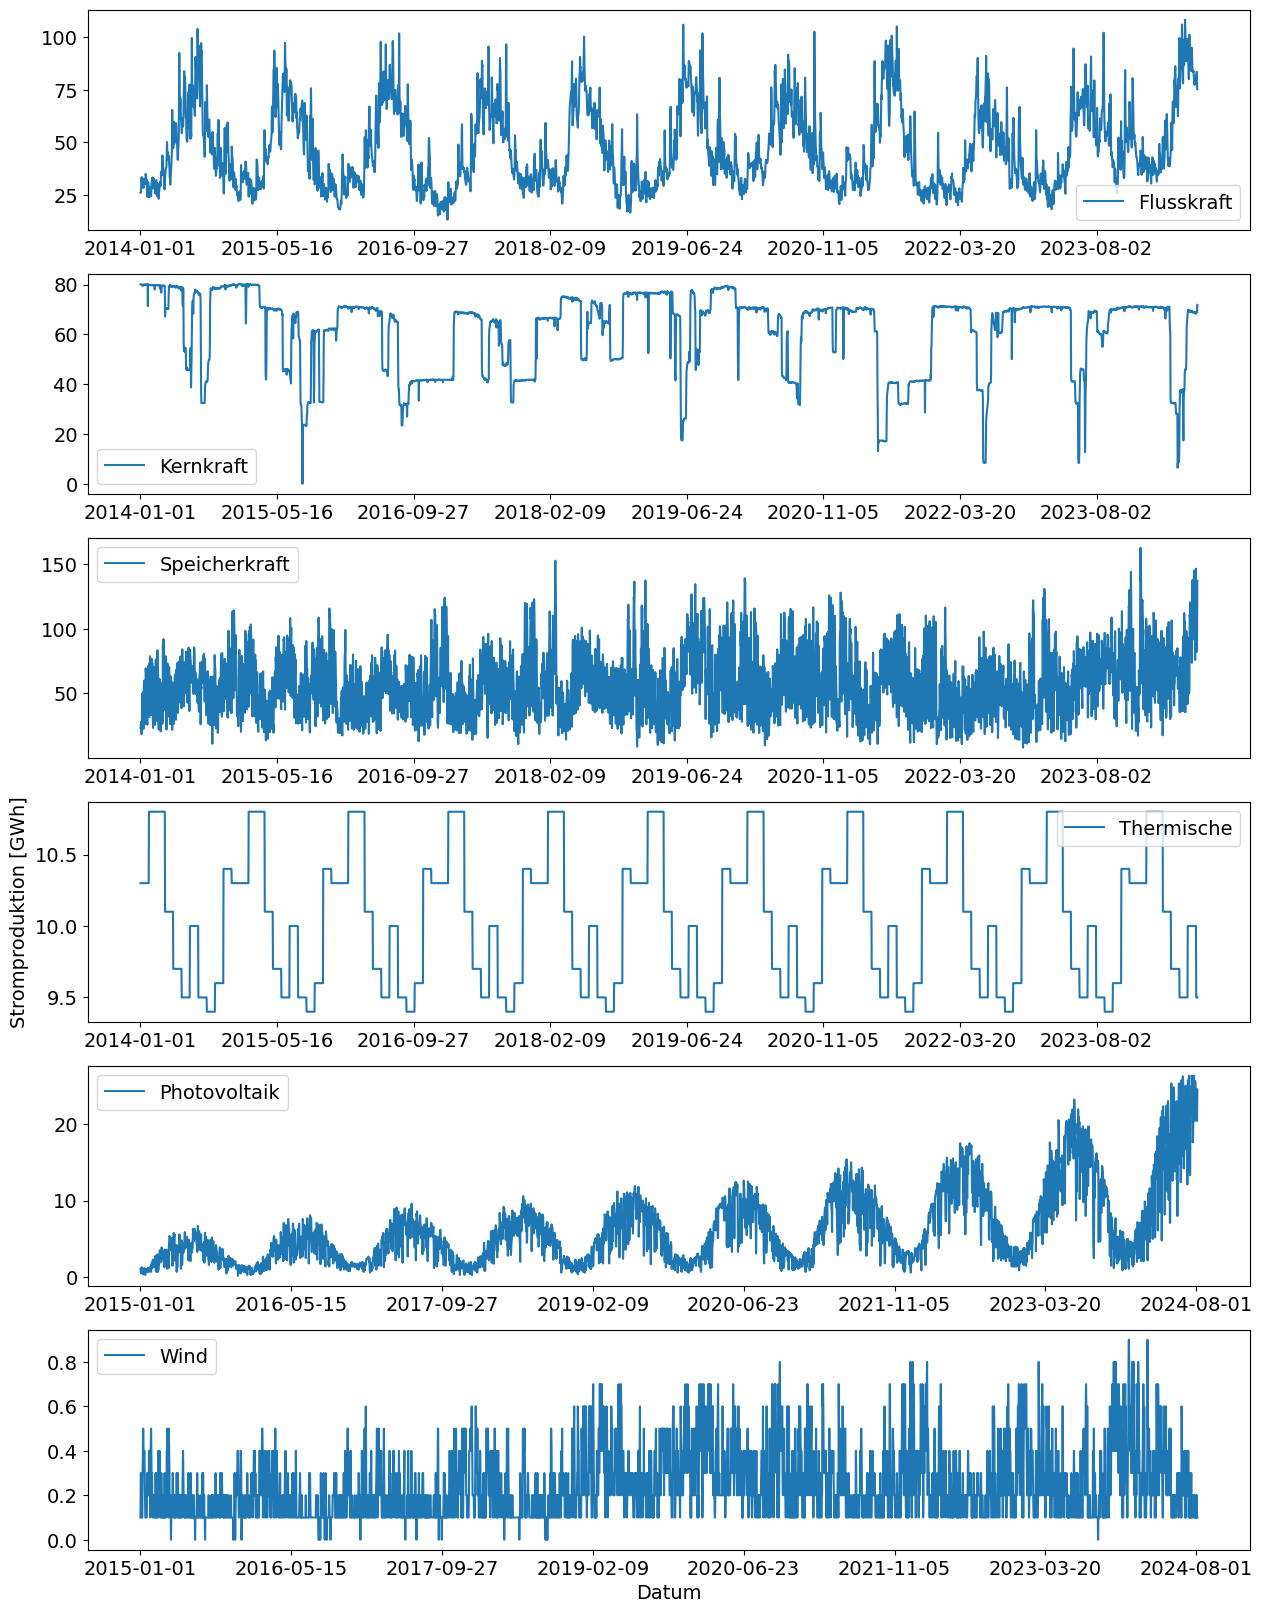

In [12]:
# Matplotlib subplots
f, axs = plt.subplots(6,1, figsize=(15, 20)) # Definieren der Subplots

# Subplot Stromproduktion aus Flusskraft
plt.subplot(6, 1, 1)
plt.plot(df_fluss['Datum'],df_fluss['Produktion_GWh']) 
plt.xticks(df_fluss['Datum'][0::500])
plt.legend(['Flusskraft'])

# Subplot Stromproduktion aus Kernkraft
plt.subplot(6, 1, 2)
plt.plot(df_kern['Datum'],df_kern['Produktion_GWh'])
plt.xticks(df_kern['Datum'][0::500])
plt.legend(['Kernkraft'])

# Subplot Stromproduktion aus Speicherkraftwerke
plt.subplot(6, 1, 3)
plt.plot(df_speicher['Datum'],df_speicher['Produktion_GWh'])
plt.xticks(df_speicher['Datum'][0::500])
plt.legend(['Speicherkraft'])

# Subplot Stromproduktion thermische Kraftwerke
plt.subplot(6, 1, 4)
plt.plot(df_therm['Datum'],df_therm['Produktion_GWh'])
plt.xticks(df_therm['Datum'][0::500])
plt.legend(['Thermische'])
plt.ylabel('Stromproduktion [GWh]')

# Subplot Stromproduktion aus Photovoltaik
plt.subplot(6, 1, 5)
plt.plot(df_photo['Datum'],df_photo['Produktion_GWh'])
plt.xticks(df_photo['Datum'][0::500])
plt.legend(['Photovoltaik'])

# Subplot Stromproduktion aus Windkraft
plt.subplot(6, 1, 6)
plt.plot(df_wind['Datum'],df_wind['Produktion_GWh'])
plt.xticks(df_wind['Datum'][0::500])
plt.legend(['Wind'])
plt.xlabel('Datum')

plt.show()

Um die Zeitreihen besser vergleichen zu können werden die x- und y- Achsen zur Visualisierung angeglichen.

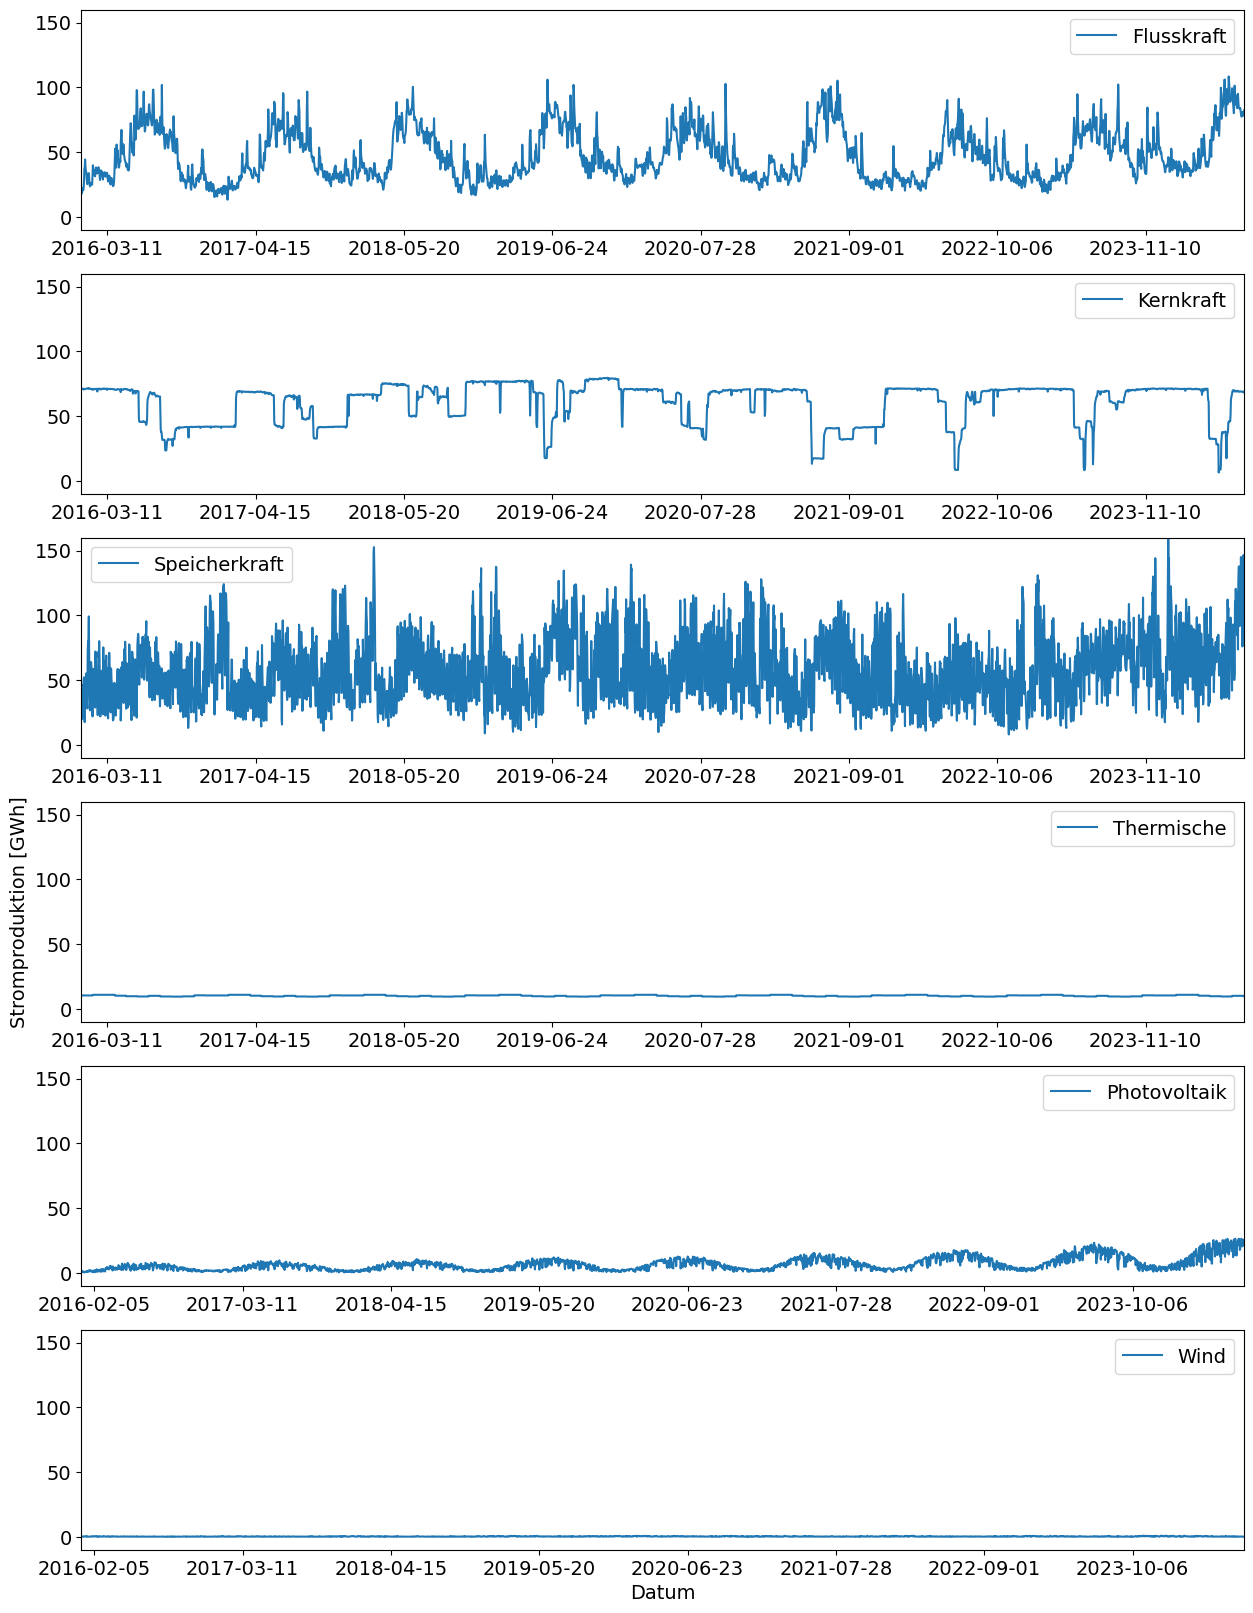

In [13]:
# Matplotlib subplots
f, axs = plt.subplots(6,1, figsize=(15, 20)) # Definieren der Subplots

lx1 = '2016-01-01' # unteres Limit x-Achse
lx2 = '2024-08-01' # oberes Limit x-Achse
ly1 = -10.0   # unteres Limit y-Achse
ly2 = 160.0 # oberes Limit y-Achse

plt.subplot(6, 1, 1) # Subplot Stromproduktion aus Flusskraft
plt.plot(df_fluss['Datum'],df_fluss['Produktion_GWh'])
plt.xticks(df_fluss['Datum'][0::400])
plt.xlim(lx1,lx2)
plt.ylim(ly1,ly2)
plt.legend(['Flusskraft'])

plt.subplot(6, 1, 2) # Subplot Stromproduktion aus Kernkraft
plt.plot(df_kern['Datum'],df_kern['Produktion_GWh'])
plt.xticks(df_kern['Datum'][0::400])
plt.xlim(lx1,lx2)
plt.ylim(ly1,ly2)
plt.legend(['Kernkraft'])

plt.subplot(6, 1, 3) # Subplot Stromproduktion aus Speicherkraft
plt.plot(df_speicher['Datum'],df_speicher['Produktion_GWh'])
plt.xticks(df_speicher['Datum'][0::400])
plt.xlim(lx1,lx2)
plt.ylim(ly1,ly2)
plt.legend(['Speicherkraft'])

plt.subplot(6, 1, 4) # Subplot Stromproduktion aus Thermischen Kraftwerken
plt.plot(df_therm['Datum'],df_therm['Produktion_GWh'])
plt.xticks(df_therm['Datum'][0::400])
plt.legend(['Thermische'])
plt.xlim(lx1,lx2)
plt.ylim(ly1,ly2)
plt.ylabel('Stromproduktion [GWh]')

plt.subplot(6, 1, 5) # Subplot Stromproduktion aus Photovoltaik
plt.plot(df_photo['Datum'],df_photo['Produktion_GWh'])
plt.xticks(df_photo['Datum'][0::400])
plt.xlim(lx1,lx2)
plt.ylim(ly1,ly2)
plt.legend(['Photovoltaik'])

plt.subplot(6, 1, 6) # Subplot Stromproduktion aus Windkraft
plt.plot(df_wind['Datum'],df_wind['Produktion_GWh'])
plt.xticks(df_wind['Datum'][0::400])
plt.xlim(lx1,lx2)
plt.ylim(ly1,ly2)
plt.legend(['Wind'])
plt.xlabel('Datum')

plt.show()

Diese Visualisierung verdeutlicht die Unterschiedlichen Strommengen, die durch die verschiedenen Energieträger erzeugt werden.